<a href="https://colab.research.google.com/github/RAMKUMAR-28112005/data-science/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV #model oluşturma
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Verisetini okuma
df = pd.read_csv('/content/Housing.csv')

In [ ]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
   # print("##################### Quantiles #####################")
   # print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


check_df(df)

##################### Shape #####################
(545, 13)
##################### Types #####################
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
##################### Head #####################
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

 

######### GRAB COL NAMES #########
Observations: 545
Variables: 13
cat_cols: 7
num_cols: 4
cat_but_car: 0
num_but_cat: 0
##########
cat_cols: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
num_cols: ['bedrooms', 'bathrooms', 'stories', 'parking']
cat_but_car: []
num_but_car: ['price', 'area']
num_but_cat: []
######### CAT SUMMARY #########
          mainroad  Ratio
mainroad                 
yes            468 85.872
no              77 14.128
######### CAT SUMMARY #########
           guestroom  Ratio
guestroom                  
no               448 82.202
yes               97 17.798
######### CAT SUMMARY #########
          basement  Ratio
basement                 
no             354 64.954
yes            191 35.046
######### CAT SUMMARY #########
                 hotwaterheating  Ratio
hotwaterheating                        
no                           520 95.413
yes                           25  4.587
######### CAT SUMMARY

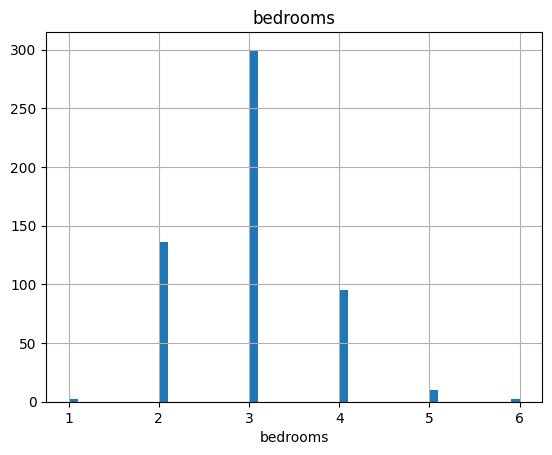

#####################################
######### NUM SUMMARY #########
count   545.000
mean      1.286
std       0.502
min       1.000
5%        1.000
10%       1.000
20%       1.000
30%       1.000
40%       1.000
50%       1.000
60%       1.000
70%       1.000
80%       2.000
90%       2.000
95%       2.000
99%       3.000
max       4.000
Name: bathrooms, dtype: float64


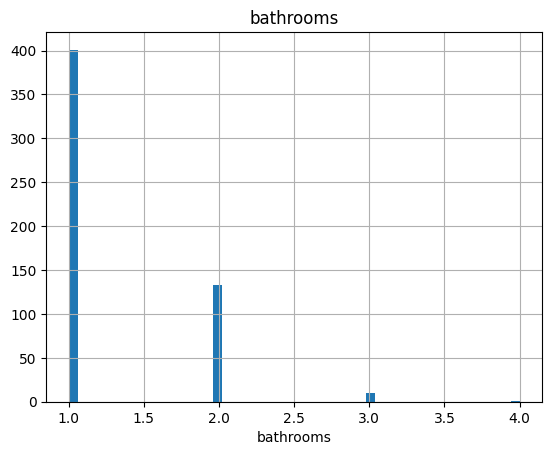

#####################################
######### NUM SUMMARY #########
count   545.000
mean      1.806
std       0.867
min       1.000
5%        1.000
10%       1.000
20%       1.000
30%       1.000
40%       1.000
50%       2.000
60%       2.000
70%       2.000
80%       2.000
90%       3.000
95%       4.000
99%       4.000
max       4.000
Name: stories, dtype: float64


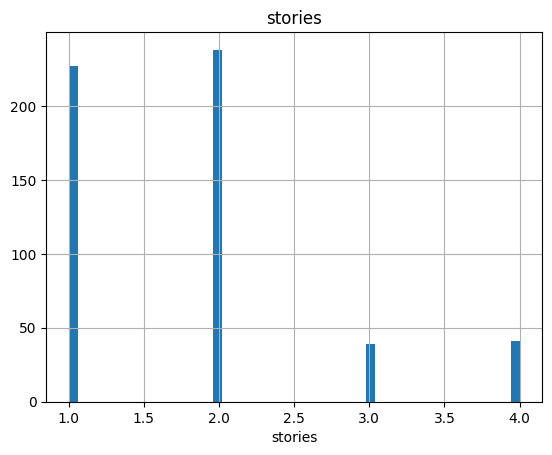

#####################################
######### NUM SUMMARY #########
count   545.000
mean      0.694
std       0.862
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       0.000
60%       1.000
70%       1.000
80%       2.000
90%       2.000
95%       2.000
99%       3.000
max       3.000
Name: parking, dtype: float64


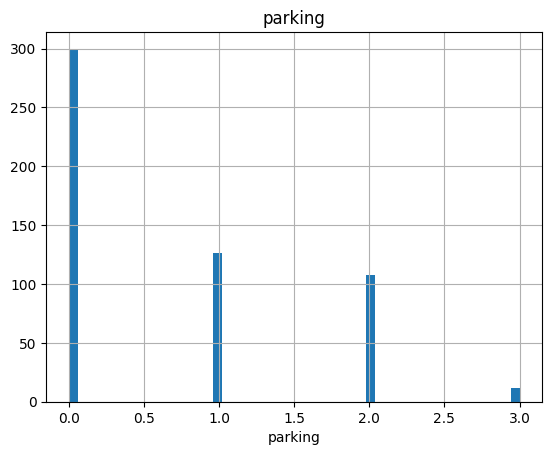

#####################################
######### TARGET SUMMARY #########
          TARGET_MEAN
mainroad             
no        3398904.545
yes       4991777.329


######### TARGET SUMMARY #########
           TARGET_MEAN
guestroom             
no         4544545.625
yes        5792896.907


######### TARGET SUMMARY #########
          TARGET_MEAN
basement             
no        4509965.932
yes       5242615.183


######### TARGET SUMMARY #########
                 TARGET_MEAN
hotwaterheating             
no               4728593.154
yes              5559960.000


######### TARGET SUMMARY #########
                 TARGET_MEAN
airconditioning             
no               4191939.678
yes              6013220.581


######### TARGET SUMMARY #########
          TARGET_MEAN
prefarea             
no        4425298.777
yes       5879045.703


######### TARGET SUMMARY #########
                  TARGET_MEAN
furnishingstatus             
furnished         5495696.000
semi-furnished    4907524.2

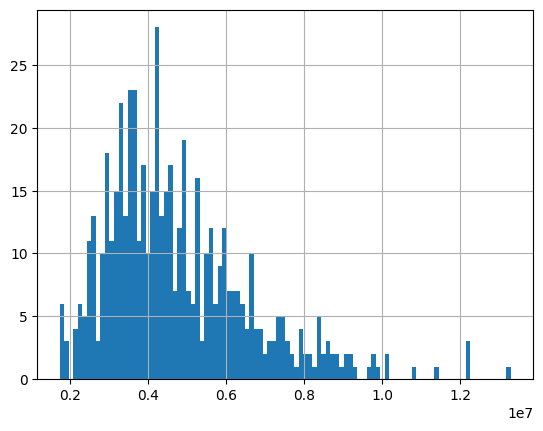

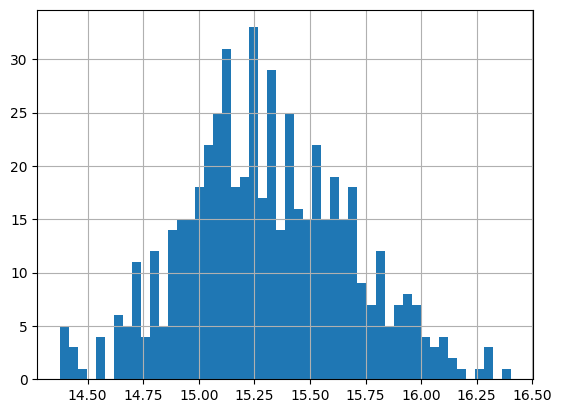

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    #cat_cols, cat_but_car
    cat_cols =  [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in df.columns if df[col]. nunique() < 3 and df[col].dtypes in ["int", "float"]]

    num_but_car = [col for col in df.columns if df[col].nunique() > 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > 5 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    num_cols = [col for col in num_cols if col not in num_but_car]

    print("######### GRAB COL NAMES #########")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    print("##########")
    print(f"cat_cols: {cat_cols}")
    print(f"num_cols: {num_cols}")
    print(f"cat_but_car: {cat_but_car}")
    print(f"num_but_car: {num_but_car}")
    print(f"num_but_cat: {num_but_cat}")

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)



######################################
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
######################################

def cat_summary(dataframe, col_name, plot=False):
    print("######### CAT SUMMARY #########")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)



######################################
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
######################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print("######### NUM SUMMARY #########")
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)



######################################
# 4. Hedef Değişken Analizi (Analysis of Target Variable)
######################################

def target_summary_with_cat(dataframe, target, categorical_col):
    print("######### TARGET SUMMARY #########")
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"price",col)



# Bağımlı değişkenin incelenmesi
df["price"].hist(bins=100)
plt.show()

# Bağımlı değişkenin logaritmasının incelenmesi
np.log1p(df['price']).hist(bins=50)
plt.show()

In [ ]:
df["furnishingstatus"] = df["furnishingstatus"].replace({
    "semi-furnished": "furnished"
 }) # semi-furnished → furnished olarak değiştiriyoruz

df["furnishingstatus"] = df["furnishingstatus"].map({
    "furnished": 1,
    "unfurnished": 0
 }) # Şimdi furnished = 1, unfurnished = 0 olarak sayısal hale getiriyoruz

print(df["furnishingstatus"].value_counts()) # Kontrol etmek istersen:

cat_cols = [col for col in cat_cols if col != "furnishingstatus"]


# One Hot Encoding fonksiyon
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    dataframe = dataframe.astype(int)
    return dataframe

df_encoded = one_hot_encoder(df, cat_cols, drop_first=True)

# Sonuçları kontrol edelim
df_encoded.head()

furnishingstatus
1    367
0    178
Name: count, dtype: int64


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,1,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,1,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,1,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,1,1,1,1,0,1,0


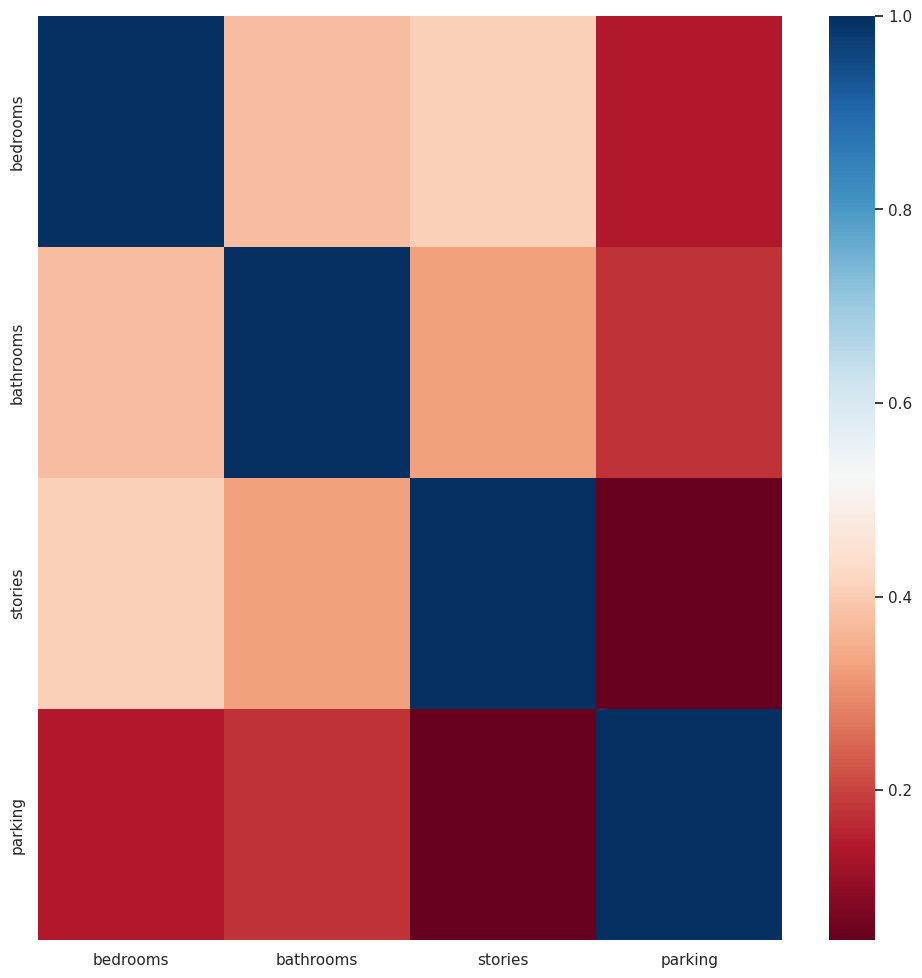

Tüm korelasyon değerleri geçerli.


[]

In [ ]:
corr = df_encoded[num_cols].corr()
corr

# Korelasyonların gösterilmesi
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()



def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()

    corr = df_encoded.corr()
    invalid_mask = ~np.isfinite(corr.values)
    if invalid_mask.any():
        print("Geçersiz değer bulunan hücreler:")
        rows, cols = np.where(invalid_mask)
        for r, c in zip(rows, cols):
            print(f"{corr.index[r]} - {corr.columns[c]}: {corr.values[r][c]}")
    else:
        print("Tüm korelasyon değerleri geçerli.")

    return drop_list

high_correlated_cols(df_encoded, plot=False)

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "price":
      print(col, check_outlier(df_encoded, col))

bedrooms False
bathrooms True
stories False
parking False


In [ ]:
def missing_values_table(dataframe, na_name=False, plot=True):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df_encoded)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
train_df = df_encoded[df_encoded['price'].notnull()]
test_df = df_encoded[df_encoded['price'].isnull()]

y = train_df['price']
X = train_df.drop(["price"], axis=1)

# Train verisi ile model kurup, model başarısını değerlendiriniz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 1292510.1823 (LR) 
RMSE: 1292597.7963 (Ridge) 
RMSE: 1292511.5076 (Lasso) 
RMSE: 1448288.0007 (ElasticNet) 
RMSE: 1820128.8047 (KNN) 
RMSE: 1879239.6821 (CART) 
RMSE: 1502287.0419 (RF) 
RMSE: 1821773.9454 (SVR) 
RMSE: 1425525.4921 (GBM) 
RMSE: 1542345.6139 (XGBoost) 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 11
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test verisinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Modelin kurulması
lgbm = LGBMRegressor().fit(X_train, y_train)

# Test verisiyle tahmin
y_pred = lgbm.predict(X_test)

# LOG dönüşümün tersini alma
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

# Gerçek RMSE hesaplama
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print("RMSE (Gerçek Fiyatlar Üzerinden):", rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 12
[LightGBM] [Info] Start training from score 15.316150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Ridge modeli
ridge_model = Ridge().fit(X_train, y_train)
y_pred_log = ridge_model.predict(X_test)

# LOG dönüşümün tersi
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesaplama
rmse_ridge = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Ridge RMSE (Gerçek Fiyatlar):", f"{rmse_ridge:,.0f}")

Ridge RMSE (Gerçek Fiyatlar): 894,506


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Lasso modeli
lasso_model = Lasso().fit(X_train, y_train)
y_pred_log = lasso_model.predict(X_test)

# Log dönüşümün tersi (gerçek fiyatlar)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesapla
rmse_lasso = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Lasso RMSE (Gerçek Fiyatlar):", f"{rmse_lasso:,.0f}")

Lasso RMSE (Gerçek Fiyatlar): 1,458,977


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# ElasticNet modeli (alpha=1.0, l1_ratio=0.5 varsayılan)
enet_model = ElasticNet().fit(X_train, y_train)
y_pred_log = enet_model.predict(X_test)

# Ters log dönüşüm (gerçek fiyatlara dönüş)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesapla
rmse_enet = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("ElasticNet RMSE (Gerçek Fiyatlar):", f"{rmse_enet:,.0f}")

ElasticNet RMSE (Gerçek Fiyatlar): 1,459,581


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Random Forest modeli
rf_model = RandomForestRegressor(random_state=17).fit(X_train, y_train)
y_pred_log = rf_model.predict(X_test)

# Ters log dönüşüm (gerçek fiyatlar)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesaplama
rmse_rf = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Random Forest RMSE (Gerçek Fiyatlar):", f"{rmse_rf:,.0f}")


Random Forest RMSE (Gerçek Fiyatlar): 907,408


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# GBM modeli
gbm_model = GradientBoostingRegressor(random_state=17).fit(X_train, y_train)
y_pred_log = gbm_model.predict(X_test)

# Log dönüşümün tersi (gerçek fiyat)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesapla
rmse_gbm = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Gradient Boosting RMSE (Gerçek Fiyatlar):", f"{rmse_gbm:,.0f}")

Gradient Boosting RMSE (Gerçek Fiyatlar): 910,912


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# XGBoost modeli
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=17).fit(X_train, y_train)
y_pred_log = xgb_model.predict(X_test)

# Ters log dönüşüm
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesapla
rmse_xgb = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("XGBoost RMSE (Gerçek Fiyatlar):", f"{rmse_xgb:,.0f}")

XGBoost RMSE (Gerçek Fiyatlar): 978,386


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# CatBoost modeli
cat_model = CatBoostRegressor(verbose=False, random_state=17).fit(X_train, y_train)
y_pred_log = cat_model.predict(X_test)

# Ters log dönüşüm
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# RMSE hesapla
rmse_cat = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("CatBoost RMSE (Gerçek Fiyatlar):", f"{rmse_cat:,.0f}")

CatBoost RMSE (Gerçek Fiyatlar): 846,094


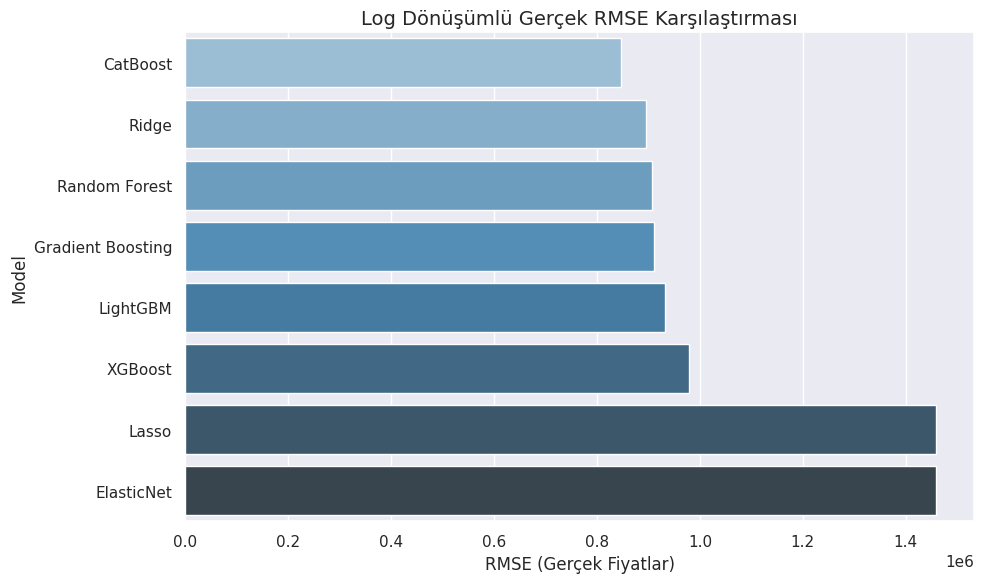

In [ ]:
rmse_df = pd.DataFrame({
    "Model": [
        "CatBoost", "Ridge", "Random Forest", "Gradient Boosting",
        "LightGBM", "XGBoost", "Lasso", "ElasticNet"
    ],
    "RMSE": [
        846094, 894506, 907558, 910912,
        931212, 978386, 1458977, 1459581
    ]
})

# RMSE değerine göre sıralama
rmse_df = rmse_df.sort_values(by="RMSE")

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x="RMSE", y="Model", palette="Blues_d")
plt.title("Log Dönüşümlü Gerçek RMSE Karşılaştırması", fontsize=14)
plt.xlabel("RMSE (Gerçek Fiyatlar)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

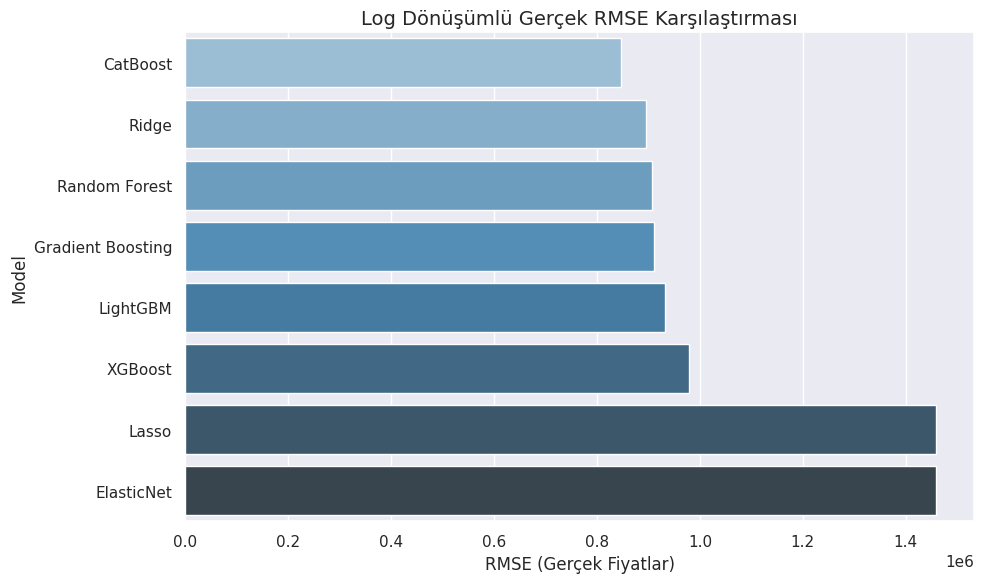

In [ ]:
rmse_df = pd.DataFrame({
    "Model": [
        "CatBoost", "Ridge", "Random Forest", "Gradient Boosting",
        "LightGBM", "XGBoost", "Lasso", "ElasticNet"
    ],
    "RMSE": [
        846094, 894506, 907558, 910912,
        931212, 978386, 1458977, 1459581
    ]
})

# RMSE değerine göre sıralama
rmse_df = rmse_df.sort_values(by="RMSE")

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x="RMSE", y="Model", palette="Blues_d")
plt.title("Log Dönüşümlü Gerçek RMSE Karşılaştırması", fontsize=14)
plt.xlabel("RMSE (Gerçek Fiyatlar)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Ridge modeli ve parametre grid'i
ridge = Ridge()
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100, 500, 1000]}

ridge_gs = GridSearchCV(ridge, ridge_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
ridge_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi alpha:", ridge_gs.best_params_)

# Tahmin ve performans
best_ridge = ridge_gs.best_estimator_
y_pred_log = best_ridge.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_ridge_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Ridge (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_ridge_optimized:,.0f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
En iyi alpha: {'alpha': 1}
Ridge (Optimizasyonlu) RMSE (Gerçek Fiyatlar): 894,506


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Random Forest ve parametre grid'i
rf = RandomForestRegressor(random_state=17)
rf_params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5, 10, 15],
    "max_features": ["auto", "sqrt", "log2"]
}

rf_gs = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", verbose=1)
rf_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", rf_gs.best_params_)

# Tahmin ve performans
best_rf = rf_gs.best_estimator_
y_pred_log = best_rf.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_rf_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Random Forest (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_rf_optimized:,.0f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
En iyi parametreler: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Random Forest (Optimizasyonlu) RMSE (Gerçek Fiyatlar): 846,814


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# GBM ve parametre grid'i
gbm = GradientBoostingRegressor(random_state=17)
gbm_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0]
}

gbm_gs = GridSearchCV(gbm, gbm_params, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", verbose=1)
gbm_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", gbm_gs.best_params_)

# Tahmin ve performans
best_gbm = gbm_gs.best_estimator_
y_pred_log = best_gbm.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_gbm_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Gradient Boosting (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_gbm_optimized:,.0f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Gradient Boosting (Optimizasyonlu) RMSE (Gerçek Fiyatlar): 851,550


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# LGBM ve parametre grid'i
lgbm = LGBMRegressor(random_state=17)
lgbm_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 300, 500],
    "max_depth": [-1, 3, 5, 7],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

lgbm_gs = GridSearchCV(lgbm, lgbm_params, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", verbose=1)
lgbm_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", lgbm_gs.best_params_)

# Tahmin ve performans
best_lgbm = lgbm_gs.best_estimator_
y_pred_log = best_lgbm.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_lgbm_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("LightGBM (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_lgbm_optimized:,.0f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 12
[LightGBM] [Info] Start training from score 15.316150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# XGBoost ve parametre grid'i
xgb = XGBRegressor(objective="reg:squarederror", random_state=17)
xgb_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

xgb_gs = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", verbose=1)
xgb_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", xgb_gs.best_params_)

# Tahmin ve performans
best_xgb = xgb_gs.best_estimator_
y_pred_log = best_xgb.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_xgb_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("XGBoost (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_xgb_optimized:,.0f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
En iyi parametreler: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}
XGBoost (Optimizasyonlu) RMSE (Gerçek Fiyatlar): 824,566


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Lasso ve parametre grid'i
lasso = Lasso()
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

lasso_gs = GridSearchCV(lasso, lasso_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
lasso_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi alpha:", lasso_gs.best_params_)

# Tahmin ve performans
best_lasso = lasso_gs.best_estimator_
y_pred_log = best_lasso.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_lasso_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("Lasso (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_lasso_optimized:,.0f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
En iyi alpha: {'alpha': 0.0001}
Lasso (Optimizasyonlu) RMSE (Gerçek Fiyatlar): 896,509


In [ ]:
y = np.log1p(df_encoded["price"])
X = df_encoded.drop(["price"], axis=1)

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# ElasticNet ve parametre grid'i
elastic_net = ElasticNet()
elastic_net_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

elastic_net_gs = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
elastic_net_gs.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", elastic_net_gs.best_params_)

# Tahmin ve performans
best_enet = elastic_net_gs.best_estimator_
y_pred_log = best_enet.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

rmse_enet_optimized = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print("ElasticNet (Optimizasyonlu) RMSE (Gerçek Fiyatlar):", f"{rmse_enet_optimized:,.0f}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
En iyi parametreler: {'alpha': 0.001, 'l1_ratio': 0.1}
ElasticNet (Optimizasyonlu) RMSE (Gerçek Fiyatlar): 895,407


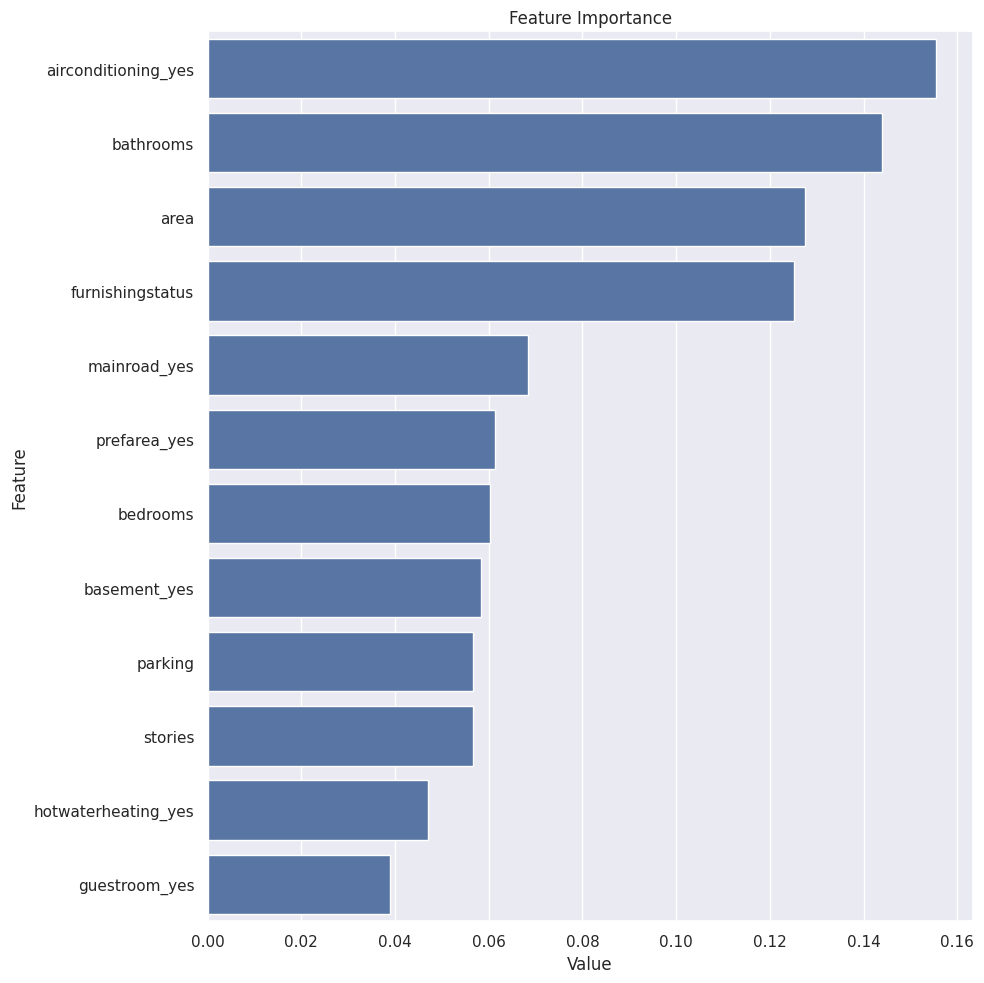

In [ ]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

# Burada en iyi model olarak XGBoost'u kullanıyoruz (ancak istediğin başka bir modelle de çalıştırabilirsin)
plot_importance(best_xgb, X)